## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


-Kaycee Sampler
-Part time 05/13/19 Cohort
-Scheduled Review: 24 June 19, 1830
-Instructor: Jeff Herman
-Blog Post: 

# Approach to the Project: 
1. Import data and necessary libraries
2. Clean data and analyze 
3. Visualize data and explain what it means
4. Ask questions
5. Create linear regressions and visualizations to answer questions
6. Create multivariate model to predict home price
7. Interpret results and give a summary of the model 

## Import the necessary libraries

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

## Read in the Data and Preview

In [3]:
df = pd.read_csv("kc_house_data.csv")

In [4]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [5]:
#Cleaning Steps: 
#summarize data
#look for null values 
#deal with missing data
#understand dimensionality
#types of data
#find 3 most important linear relationships
#slice 3 most important

## Begin the Data Cleaning Process

In [6]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

I will begin by using a .isnull() search to find any NaN values

In [7]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

It would appear that there are null values in the "waterfront","view", and "yr_renovated" columns. 

First I would like to look at whether each of these values has an effect on the price, and if they do, whether they constitute enough of a percentage of the data to consider replacing the null values, or dropping the null values altogether. 

#### Waterfront Variable

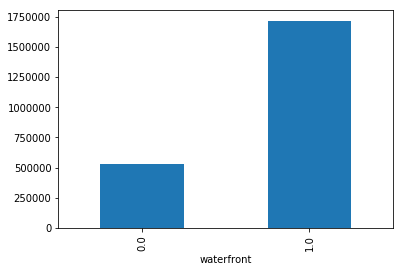

In [8]:
waterfront_price = df.groupby('waterfront')['price'].mean().plot(kind = 'bar')

A property's value increases if it is a waterfront property. I would now like to check what percentage of the data this is to help determine whether I will fill the null values or drop them. 

In [9]:
df['waterfront'].value_counts(normalize = True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

The waterfront factor does affect housing price, however, because it has such a large percentage of null values and is only 1% of my data, I will drop the column.

In [10]:
df.drop('waterfront', axis = 1, inplace = True)
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  view  condition  grade  sqft_above sqft_basement  \
0      5650     1.0   0.0          3      7        1180           0.0   
1      7242     2.0   0.0          3      7        2170         400.0   
2     10000     1.0   0.0          3      6         770           0.0   
3      5000     1.0   0.0          5      7        1050         910.0   
4      8080     1.0   0.0          3      8        1680           0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           NaN    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

#### Yr_renovated Variable

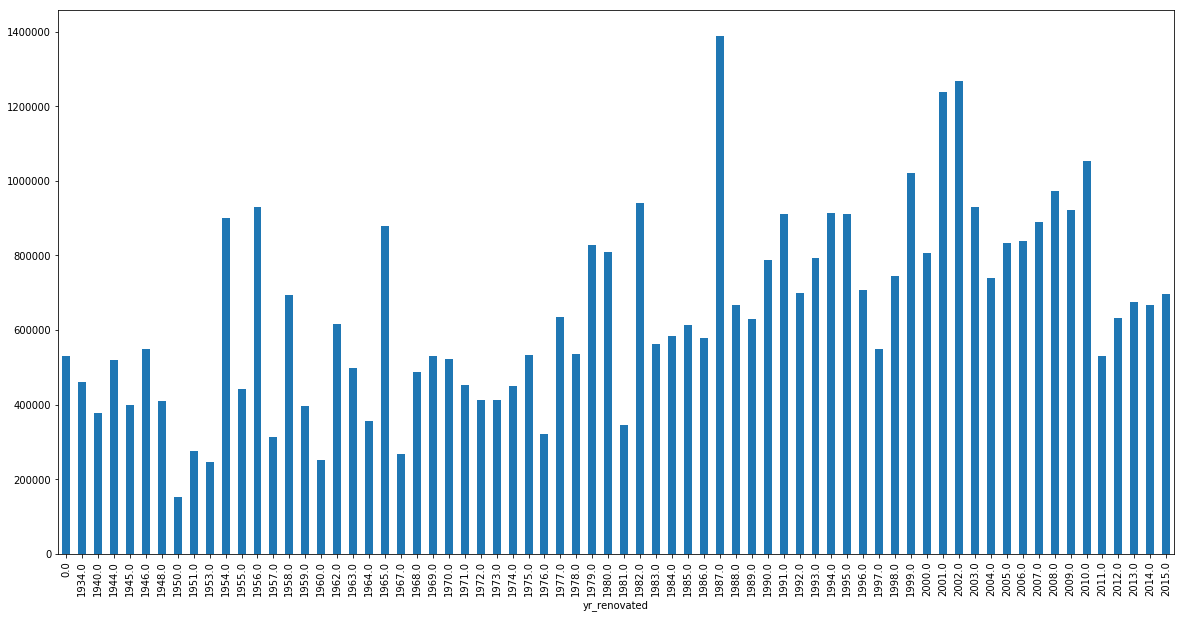

In [11]:
df.groupby('yr_renovated')['price'].mean().plot(kind = 'bar',figsize = (20,10))

This has enough value on price that I don't want to delete the column all together.I must decide how to proceed. 

In [12]:
#how many values where yr_renovated = 0 
df['yr_renovated'].value_counts(normalize = True).sort_index()
#Value 0= ~1% of the data. I am okay dropping the null values. 

0.0       0.958096
1934.0    0.000056
1940.0    0.000113
1944.0    0.000056
1945.0    0.000169
1946.0    0.000056
1948.0    0.000056
1950.0    0.000056
1951.0    0.000056
1953.0    0.000056
1954.0    0.000056
1955.0    0.000169
1956.0    0.000169
1957.0    0.000113
1958.0    0.000169
1959.0    0.000056
1960.0    0.000169
1962.0    0.000113
1963.0    0.000225
1964.0    0.000282
1965.0    0.000225
1967.0    0.000113
1968.0    0.000394
1969.0    0.000225
1970.0    0.000507
1971.0    0.000056
1972.0    0.000169
1973.0    0.000225
1974.0    0.000113
1975.0    0.000282
            ...   
1986.0    0.000789
1987.0    0.000789
1988.0    0.000620
1989.0    0.001126
1990.0    0.001239
1991.0    0.000901
1992.0    0.000732
1993.0    0.000676
1994.0    0.000789
1995.0    0.000676
1996.0    0.000620
1997.0    0.000676
1998.0    0.000901
1999.0    0.000845
2000.0    0.001633
2001.0    0.000845
2002.0    0.000957
2003.0    0.001746
2004.0    0.001239
2005.0    0.001633
2006.0    0.001126
2007.0    0.

In [13]:
df['yr_renovated'].fillna(0, inplace = True)

The null values are now recorded as 0 - houses that have probably never been renovated.

#### View Variable 

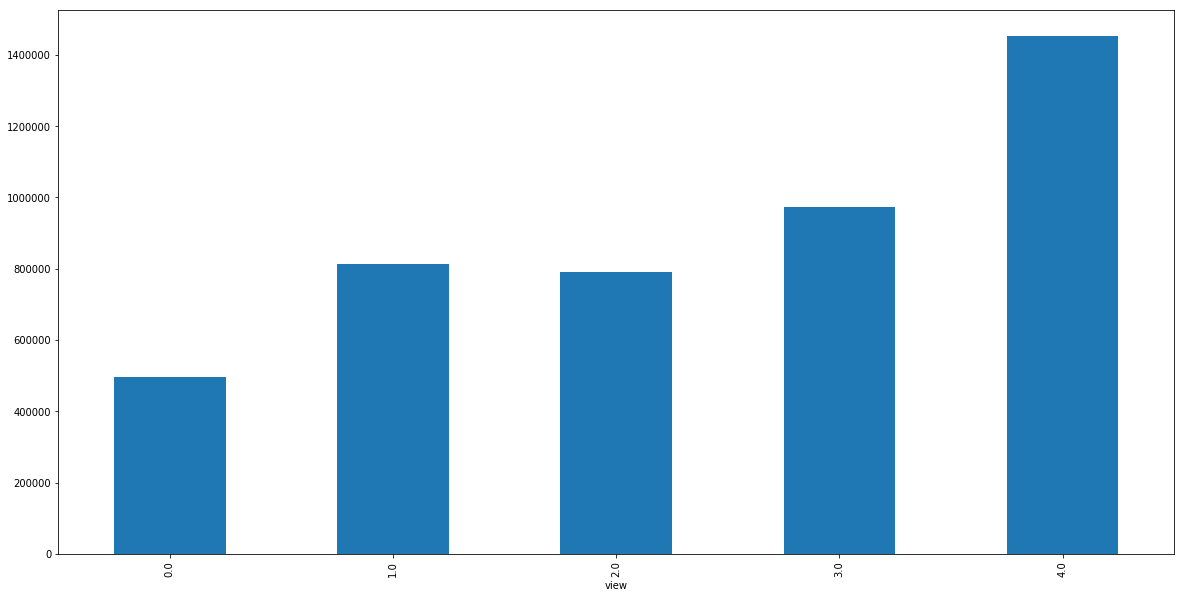

In [14]:
df.groupby('view')['price'].mean().plot(kind = 'bar',figsize = (20,10))

This variable very clearly affects price. Because of the high percentage of 0 values and the fact that the variable is categorical, I will fill the null values with the median, rather than the mean. 

In [15]:
view_med = df['view'].median()
view_med

0.0

In [16]:
df['view'].fillna(view_med, inplace = True)

## Sanity Check 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(11), object(2)
memory usage: 3.3+ MB


In [18]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

# Asking questions to Explore the Data

I started with a seaborn pair plot to investigate relationships that looked linear. This helped to guide which questions I asked to help further explore my data set. 

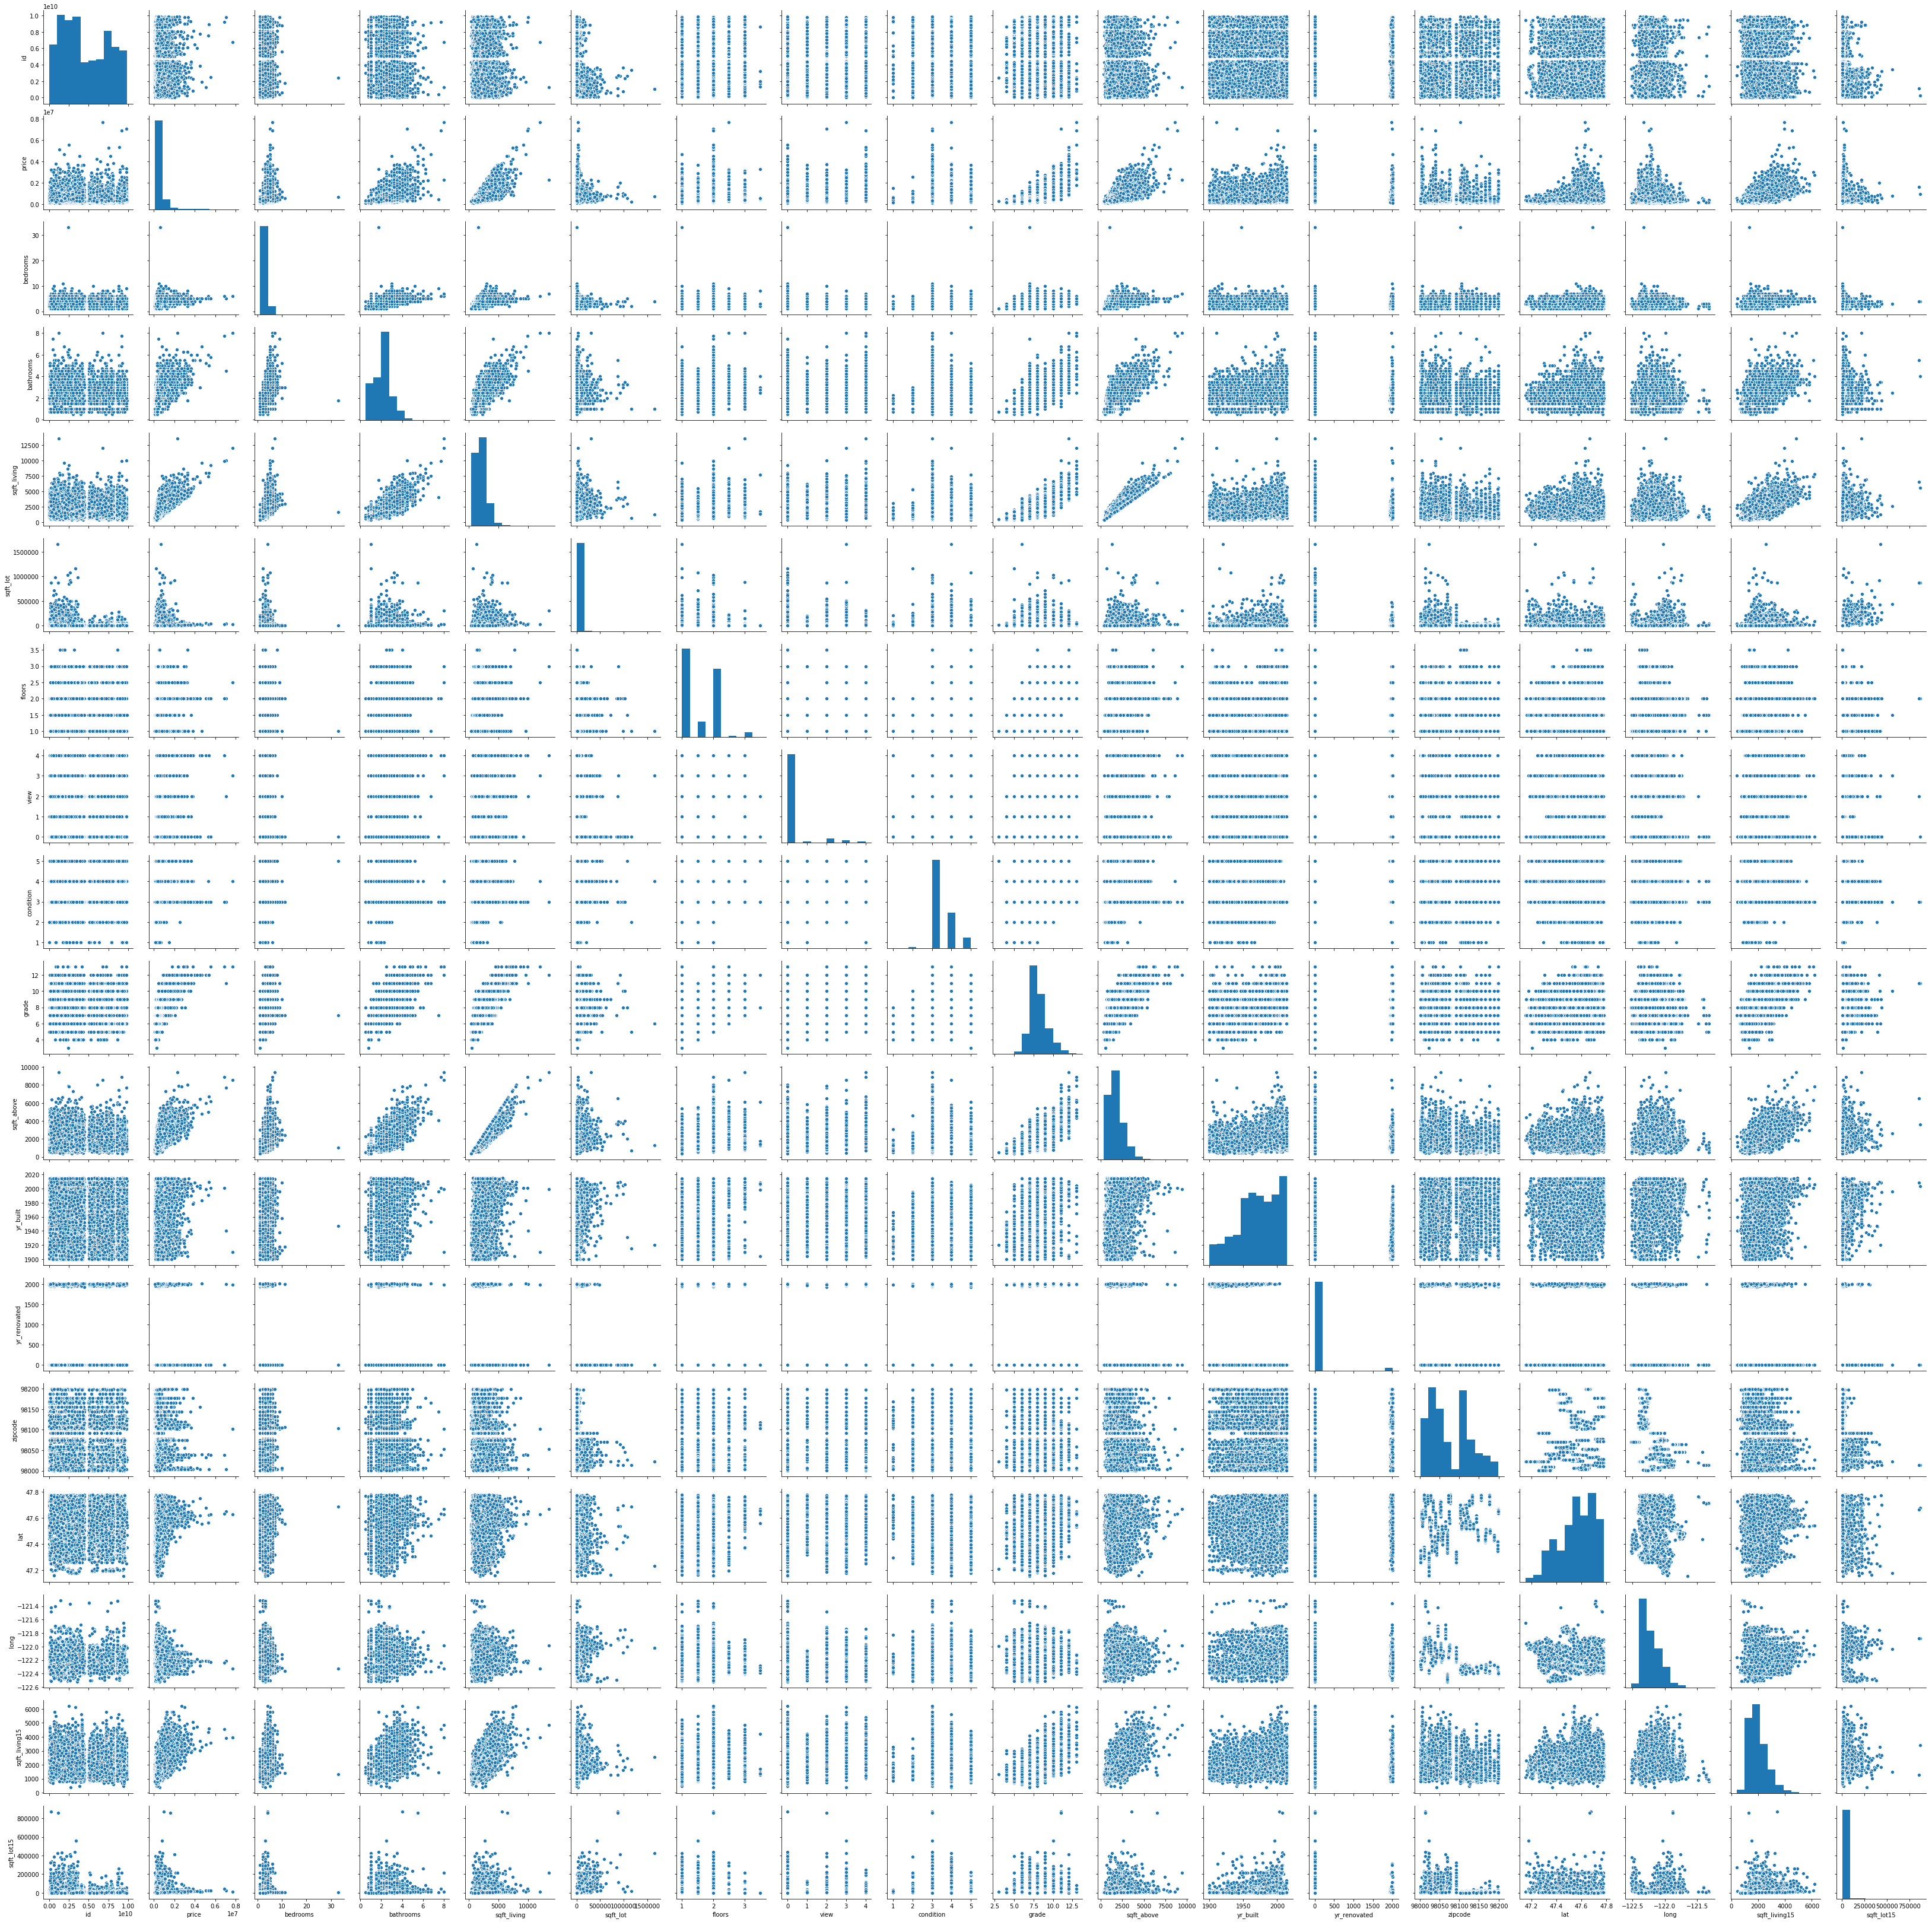

In [19]:
sns.pairplot(df)

In [20]:
#price vs. sqft_living, sqft_living vs. bedrooms, and bedrooms vs. bathrooms. 

### What is the effect of sqft_living on price?  

### Is there a relationship between sqft_living and bedrooms? 

### Are bedrooms and bathrooms correlated? What is their effect on price? 

# Question 1: What is the effect of sqft_living on price? 

<function matplotlib.pyplot.show(*args, **kw)>

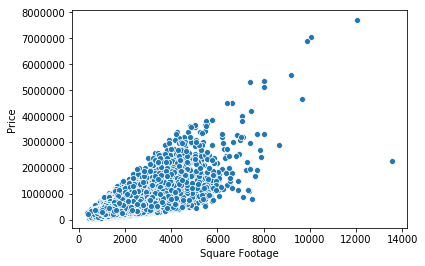

In [21]:
ax =sns.scatterplot(df['sqft_living'],df['price'])
ax.set(xlabel = "Square Footage", ylabel = "Price")
plt.show

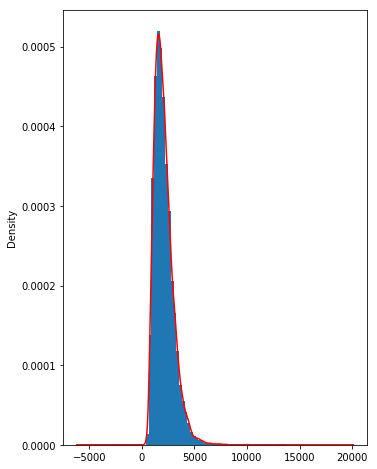

In [22]:
#histogram
fig = plt.figure(figsize = (12,8))

ax1= plt.subplot(1,2,1)
df['sqft_living'].hist(ax = ax1, bins = 50,density = True)
df['sqft_living'].plot.kde(color= 'red')
plt.show()

This data has a definite left skew, but is it normal enough to use for linear regression? We will try it. 

In [23]:
#linear regression
f= 'price~sqft_living'
sqft_model = smf.ols(formula = f, data = df).fit()

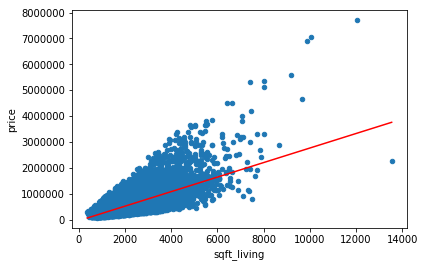

In [24]:
#graph linear regression 
sqft_model_df= pd.DataFrame({'sqft_living':[df['sqft_living'].min(),df['sqft_living'].max()]})
pred_sqft = sqft_model.predict(sqft_model_df)

ax1 = df.plot(x='sqft_living',y= 'price', kind = "scatter")
ax2 = plt.plot(sqft_model_df,pred_sqft, color = 'red')
ax1.xlabel = "Square Footage"
ax1.ylabel = "Price"

The model does not represent a good linear relationship, nor does our regression line appear to be a good fit to our data. 

<Figure size 864x576 with 0 Axes>

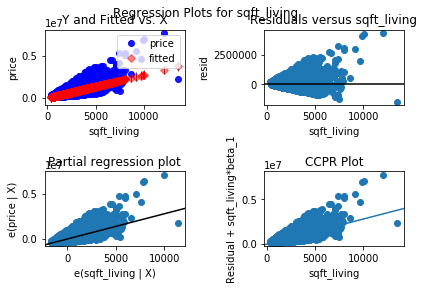

In [25]:
fig = plt.figure(figsize = (12,8))
sm.graphics.plot_regress_exog(sqft_model,'sqft_living')
plt.show()

The data is heteroscedastic. This is not a good model. Therefore, sqft_living is not an accurate predictor of home price. 

In [26]:
sqft_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:23:34   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

r squared = 0.493 Nearly half of variance is described by the dependent variable (sqft_living)
p = 0.00 This is good, we can reject the null, but the data still appears heteroscadastic. 
We can reject the null- there is some relationship between price and sqft_living, however due to the heteroscedasticity of the data, and an r squared value at 49%, we cannot use linear regression to make an accurate prediction of housing price based on sqft_living. 

# Question 2: Is there a relationship between sqft_living and bedrooms?

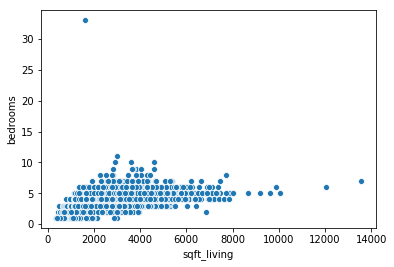

In [27]:
sns.scatterplot(df['sqft_living'],df['bedrooms'])

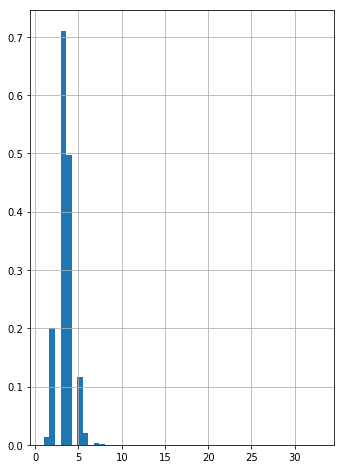

In [28]:
#create a histogram
fig = plt.figure(figsize = (12,8))

ax1= plt.subplot(1,2,1)
df['bedrooms'].hist(ax = ax1, bins = 50,density = True)
plt.show()

In [29]:
#create a linear regression model 
f= 'bedrooms~sqft_living'
bedrooms_model = smf.ols(formula= f, data= df).fit()

In [30]:
bedrooms_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bedrooms   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                 1.085e+04
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:23:35   Log-Likelihood:                -24596.
No. Observations:               21597   AIC:                         4.920e+04
Df Residuals:                   21595   BIC:                         4.921e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1596      0.013    169.547      0.000       2.135       2.185
sqft_living     0.0006    5.6e-06    104.144      0.000       0.001       0.001
==============================================================================
Omnibus:                    19579.742   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12007097.553
Skew:                           3.389   Prob(JB):                         0.00
Kurtosis:                     118.313   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

p = 0.00 - We can reject the null- there is SOME relationship between sqft_living and number of bedrooms, however
r squared = 33%, therefore, there is very little linear relationship here. 

I would like to illustrate the lack of a linear relationship using a q-q plot. If a linear relationship exists, the blue data points should fit closely to the linear red line. If they vary, there is a poor linaer relationship. 

<function matplotlib.pyplot.show(*args, **kw)>

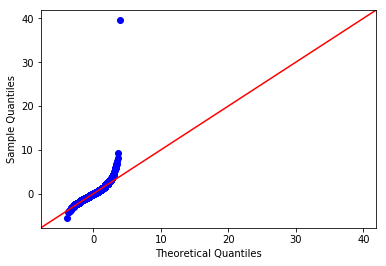

In [31]:
sm.graphics.qqplot(bedrooms_model.resid, dist = stats.norm, line = '45', fit = True)
plt.show

We rejected the null- there is SOME relationship between sqft_living and number of bedrooms. However, it is NOT linear
and sqft_living is not a good indicator of bedrooms. Only 33% of number of bedrooms can be explained by sqft_living. 

# Question 3: Are bedrooms and bathrooms correlated?  

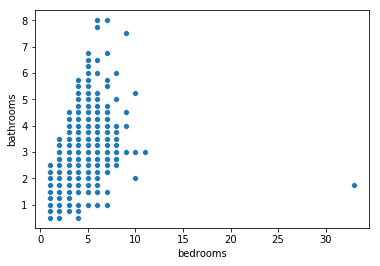

In [32]:
sns.scatterplot(df['bedrooms'],df['bathrooms'])

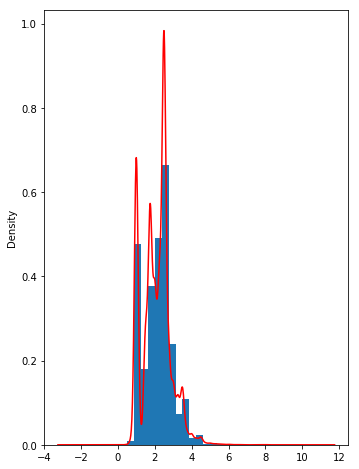

In [33]:
fig = plt.figure(figsize = (12,8))

ax1= plt.subplot(1,2,1)
df['bathrooms'].hist(ax = ax1, bins = 20, density = True)
df['bathrooms'].plot.kde(color= 'red')
plt.show()

Because of the lack of a normal KDE curve, I do not believe that a linear regression is in our best interest. It would be better to run a correlation matrix to first investigate the relationship between bedrooms and bathrooms. 

In [34]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  view  condition  grade  sqft_above sqft_basement  \
0      5650     1.0   0.0          3      7        1180           0.0   
1      7242     2.0   0.0          3      7        2170         400.0   
2     10000     1.0   0.0          3      6         770           0.0   
3      5000     1.0   0.0          5      7        1050         910.0   
4      8080     1.0   0.0          3      8        1680           0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           0.0    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

In [35]:
df[['bathrooms','bedrooms']].corr()

bathrooms  bedrooms
bathrooms   1.000000  0.514508
bedrooms    0.514508  1.000000

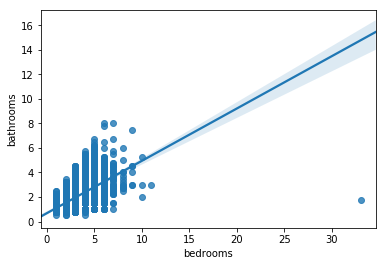

In [36]:
sns.regplot(x='bedrooms',y= 'bathrooms',data=df)

We see an error that may even be a typo in the data set- 30+ bedrooms, with only 2 bathrooms. I will be removing this outlier from the dataset. 

In [37]:
df.loc[df['bedrooms']>30]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors  view  condition  grade  sqft_above sqft_basement  \
15856      6000     1.0   0.0          5      7        1040         580.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15856      1947           0.0    98103  47.6878 -122.331           1330   

       sqft_lot15  
15856        4700

In [38]:
df.drop(15856, inplace =True)

# Beginning the Multivariate Regression Model

First I would like to check for categorical variables, and create dummy values for any that may exist. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
id               21596 non-null int64
date             21596 non-null object
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
view             21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null object
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
dtypes: float64(7), int64(11), object(2)
memory usage: 3.5+ MB


In [40]:
#sqft_basement, date are not candidates for predicting price
#for regression purposes, i think i'm going to drop ID and date anyways. 

In [41]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  view  condition  grade  sqft_above sqft_basement  \
0      5650     1.0   0.0          3      7        1180           0.0   
1      7242     2.0   0.0          3      7        2170         400.0   
2     10000     1.0   0.0          3      6         770           0.0   
3      5000     1.0   0.0          5      7        1050         910.0   
4      8080     1.0   0.0          3      8        1680           0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           0.0    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

It is strange that a variable that should be continuous (sqft_basement), is showing as a categorical variable. This merits further investigation. 

In [42]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
840.0        83
580.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
915.0         1
2390.0        1
768.0         1
1135.0        1
1880.0        1
1284.0        1
1024.0        1
862.0         1
1281.0        1
1248.0        1
2610.0        1
1481.0        1
2180.0        1
3480.0        1
2810.0        1
248.0         1
415.0         1
295.0         1
1245.0        1
666.0         1
1920.0        1
3500.0        1
1816.0        1
2130.0        1
65.0          1
143.0         1
1930.0        1
2400.0        1
2490.0        1
1852.0        1
Name: sqft_basement, Len

There was a hidden null value in the sqft_basement, illustrated by the ?. 

#### Handling the null values in sqft_basement

In [43]:
df['sqft_basement'].value_counts(normalize = True)

0.0       0.593906
?         0.021022
600.0     0.010048
500.0     0.009678
700.0     0.009631
800.0     0.009307
400.0     0.008520
1000.0    0.006853
300.0     0.006575
900.0     0.006575
200.0     0.004862
750.0     0.004816
530.0     0.004769
450.0     0.004769
480.0     0.004769
720.0     0.004538
620.0     0.004167
840.0     0.003843
580.0     0.003843
420.0     0.003751
860.0     0.003658
670.0     0.003612
1100.0    0.003612
550.0     0.003519
780.0     0.003519
650.0     0.003473
240.0     0.003427
680.0     0.003380
380.0     0.003380
360.0     0.003334
            ...   
915.0     0.000046
2390.0    0.000046
768.0     0.000046
1135.0    0.000046
1880.0    0.000046
1284.0    0.000046
1024.0    0.000046
862.0     0.000046
1281.0    0.000046
1248.0    0.000046
2610.0    0.000046
1481.0    0.000046
2180.0    0.000046
3480.0    0.000046
2810.0    0.000046
248.0     0.000046
415.0     0.000046
295.0     0.000046
1245.0    0.000046
666.0     0.000046
1920.0    0.000046
3500.0    0.

First we want to replace the "?" with something we can use- NaN

In [44]:
df['sqft_basement'] = df['sqft_basement'].replace(to_replace = "?",value = np.nan)

In [45]:
df.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

The null values are showing as objects still. We want to convert them into floats so that we can obtain the median value to fill the nulls. 

In [46]:
df['sqft_basement'].dtypes

dtype('O')

In [47]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [48]:
df['sqft_basement'].dtypes

dtype('float64')

In [49]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159600e+04  2.159600e+04  21596.000000  21596.000000  21596.000000   
mean   4.580575e+09  5.402920e+05      3.371828      2.115843   2080.343165   
std    2.876764e+09  3.673760e+05      0.904114      0.768998    918.122038   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308950e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     11.000000      8.000000  13540.000000   

           sqft_lot        floors          view     condition         grade  \
count  2.159600e+04  21596.000000  21596.000000  21596.000000  21596.000000   
mean   1.509983e+04      1.494119      0.233191      3.409752      7.657946   
std    4.141355e+04      0.539685      0.764689      0.650471      1.173218   
min    5.200000e+02      1.000000      0.000000      1.000000      3.000000   
25%    5.040000e+03      1.000000      0.000000      3.000000      7.000000   
50%    7.619000e+03      1.500000      0.000000      3.000000      7.000000   
75%    1.068550e+04      2.000000      0.000000      4.000000      8.000000   
max    1.651359e+06      3.500000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21596.000000   21142.000000  21596.000000  21596.000000  21596.000000   
mean    1788.631506     291.838095   1971.000787     68.761391  98077.950685   
std      827.763251     442.504364     29.375460    364.045627     53.514040   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21596.000000  21596.000000   21596.000000   21596.000000  
mean      47.560087   -122.213977    1986.650722   12758.656649  
std        0.138552      0.140725     685.231768   27275.018316  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [50]:
df['sqft_basement'].fillna(0, inplace = True)

In [51]:
df['sqft_basement'].value_counts(normalize = True)

0.0       0.614929
600.0     0.010048
500.0     0.009678
700.0     0.009631
800.0     0.009307
400.0     0.008520
1000.0    0.006853
900.0     0.006575
300.0     0.006575
200.0     0.004862
750.0     0.004816
450.0     0.004769
530.0     0.004769
480.0     0.004769
720.0     0.004538
620.0     0.004167
580.0     0.003843
840.0     0.003843
420.0     0.003751
860.0     0.003658
670.0     0.003612
1100.0    0.003612
780.0     0.003519
550.0     0.003519
650.0     0.003473
240.0     0.003427
680.0     0.003380
380.0     0.003380
850.0     0.003334
360.0     0.003334
            ...   
2600.0    0.000046
2610.0    0.000046
276.0     0.000046
274.0     0.000046
1245.0    0.000046
143.0     0.000046
266.0     0.000046
862.0     0.000046
2180.0    0.000046
415.0     0.000046
243.0     0.000046
1135.0    0.000046
1525.0    0.000046
3000.0    0.000046
172.0     0.000046
225.0     0.000046
518.0     0.000046
935.0     0.000046
1920.0    0.000046
1930.0    0.000046
1990.0    0.000046
588.0     0.

In order to determine categorical variables, I will observe the histograms for the tell tale seperations that continuous variables don't have. 

C:\Users\kayce_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


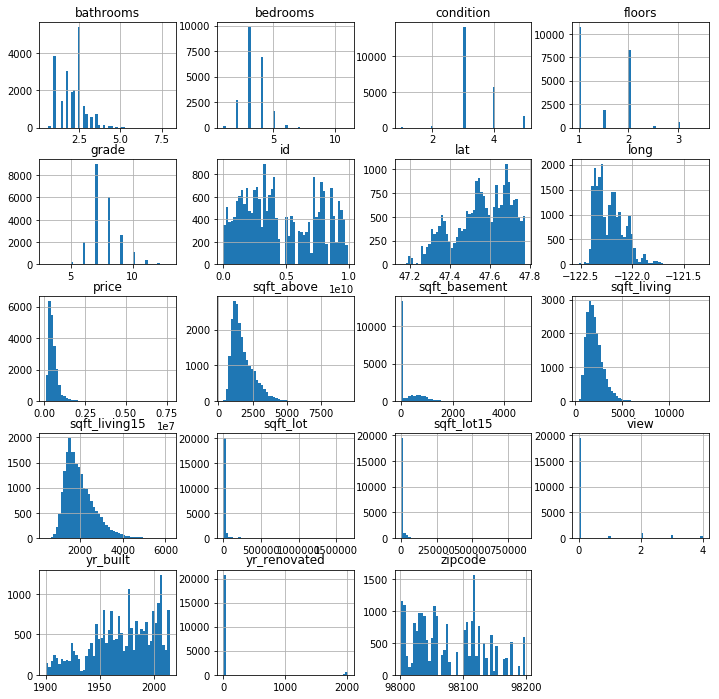

In [52]:
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax = ax,bins=50);

In [53]:
#categorical variables: view, floors, condition, bedrooms, grade

In [54]:
df.reset_index(drop= True, inplace=True)

In [55]:
#create dummies for cats
view_dummies= pd.get_dummies(df["view"], prefix="view")
floors_dummies=pd.get_dummies(df["floors"], prefix="floors")
condition_dummies=pd.get_dummies(df["condition"], prefix="condition")
bedrooms_dummies=pd.get_dummies(df["bedrooms"], prefix="bedrooms")
grade_dummies=pd.get_dummies(df["grade"], prefix="grade")

In [56]:
df1 = pd.concat([df.reset_index(),view_dummies,floors_dummies,condition_dummies,bedrooms_dummies,grade_dummies],axis = 1)

Originally, I was missing the reset_index code above the concatenation. Because I had previously dropped a row for being an outlier, this messed up the concatenation. Below is the code I used to find the problem row and how I realized I needed to use the reset_index. 

In [57]:
df.shape

(21596, 20)

In [58]:
df.index

RangeIndex(start=0, stop=21596, step=1)

In [59]:
grade_dummies.index

RangeIndex(start=0, stop=21596, step=1)

In [60]:
for x,y in zip(df.index,grade_dummies.index):
    if x != y:
        print(x,y)

In [61]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [62]:
df.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21591   263000018   5/21/2014  360000.0         3       2.50         1530   
21592  6600060120   2/23/2015  400000.0         4       2.50         2310   
21593  1523300141   6/23/2014  402101.0         2       0.75         1020   
21594   291310100   1/16/2015  400000.0         3       2.50         1600   
21595  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  view  condition  grade  sqft_above  sqft_basement  \
21591      1131     3.0   0.0          3      8        1530            0.0   
21592      5813     2.0   0.0          3      8        2310            0.0   
21593      1350     2.0   0.0          3      7        1020            0.0   
21594      2388     2.0   0.0          3      8        1600            0.0   
21595      1076     2.0   0.0          3      7        1020            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
21591      2009           0.0    98103  47.6993 -122.346           1530   
21592      2014           0.0    98146  47.5107 -122.362           1830   
21593      2009           0.0    98144  47.5944 -122.299           1020   
21594      2004           0.0    98027  47.5345 -122.069           1410   
21595      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
21591        1509  
21592        7200  
21593        2007  
21594        1287  
21595        1357

In [63]:
df1.head()

index          id        date     price  bedrooms  bathrooms  sqft_living  \
0      0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1      1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2      2  5631500400   2/25/2015  180000.0         2       1.00          770   
3      3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4      4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  view  ...  grade_4  grade_5  grade_6  grade_7  grade_8  \
0      5650     1.0   0.0  ...        0        0        0        1        0   
1      7242     2.0   0.0  ...        0        0        0        1        0   
2     10000     1.0   0.0  ...        0        0        1        0        0   
3      5000     1.0   0.0  ...        0        0        0        1        0   
4      8080     1.0   0.0  ...        0        0        0        0        1   

   grade_9  grade_10  grade_11  grade_12  grade_13  
0        0         0         0         0         0  
1        0         0         0         0         0  
2        0         0         0         0         0  
3        0         0         0         0         0  
4        0         0         0         0         0  

[5 rows x 59 columns]

In [64]:
df1.tail()

index          id        date     price  bedrooms  bathrooms  \
21591  21591   263000018   5/21/2014  360000.0         3       2.50   
21592  21592  6600060120   2/23/2015  400000.0         4       2.50   
21593  21593  1523300141   6/23/2014  402101.0         2       0.75   
21594  21594   291310100   1/16/2015  400000.0         3       2.50   
21595  21595  1523300157  10/15/2014  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  view  ...  grade_4  grade_5  grade_6  \
21591         1530      1131     3.0   0.0  ...        0        0        0   
21592         2310      5813     2.0   0.0  ...        0        0        0   
21593         1020      1350     2.0   0.0  ...        0        0        0   
21594         1600      2388     2.0   0.0  ...        0        0        0   
21595         1020      1076     2.0   0.0  ...        0        0        0   

       grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  
21591        0        1        0         0         0         0         0  
21592        0        1        0         0         0         0         0  
21593        1        0        0         0         0         0         0  
21594        0        1        0         0         0         0         0  
21595        1        0        0         0         0         0         0  

[5 rows x 59 columns]

In [65]:
for x,y in zip(df1.index,df1['index']):
    if x != y:
        print(x,y)

In [66]:
df1.loc[15850:15860]

index          id        date      price  bedrooms  bathrooms  \
15850  15850  2634500005    9/8/2014   237500.0         2       1.00   
15851  15851  6332000050   1/21/2015   464000.0         3       2.00   
15852  15852  2126049265  10/21/2014   495000.0         3       1.75   
15853  15853  7950304095   2/17/2015   257500.0         1       1.00   
15854  15854   587550010   1/16/2015   570000.0         4       3.50   
15855  15855  1402630190  11/11/2014   362000.0         3       2.50   
15856  15856  3750604417   5/26/2014   172500.0         3       1.00   
15857  15857  9547202890   1/20/2015   596000.0         2       1.00   
15858  15858  2600110250   4/30/2015   840000.0         4       2.50   
15859  15859  7403200050  11/13/2014  1600000.0         3       2.25   
15860  15860  9528104360   9/12/2014   435000.0         2       1.50   

       sqft_living  sqft_lot  floors  view  ...  grade_4  grade_5  grade_6  \
15850          810      8494     1.0   0.0  ...        0        0        1   
15851         1630      6550     1.0   0.0  ...        0        0        0   
15852         1770     10080     1.0   0.0  ...        0        0        0   
15853          710      6060     1.0   0.0  ...        0        0        1   
15854         3990     23544     1.0   2.0  ...        0        0        0   
15855         2310      7485     2.0   0.0  ...        0        0        0   
15856         1140      8800     1.0   0.0  ...        0        0        0   
15857         1040      4880     1.0   0.0  ...        0        0        0   
15858         2170      9796     1.0   0.0  ...        0        0        0   
15859         3370     23065     1.0   4.0  ...        0        0        0   
15860          901      1245     3.0   0.0  ...        0        0        0   

       grade_7  grade_8  grade_9  grade_10  grade_11  grade_12  grade_13  
15850        0        0        0         0         0         0         0  
15851        1        0        0         0         0         0         0  
15852        0        1        0         0         0         0         0  
15853        0        0        0         0         0         0         0  
15854        0        0        0         1         0         0         0  
15855        0        1        0         0         0         0         0  
15856        1        0        0         0         0         0         0  
15857        1        0        0         0         0         0         0  
15858        0        1        0         0         0         0         0  
15859        0        0        0         1         0         0         0  
15860        1        0        0         0         0         0         0  

[11 rows x 59 columns]

In [67]:
df.loc[15850:15860]

id        date      price  bedrooms  bathrooms  sqft_living  \
15850  2634500005    9/8/2014   237500.0         2       1.00          810   
15851  6332000050   1/21/2015   464000.0         3       2.00         1630   
15852  2126049265  10/21/2014   495000.0         3       1.75         1770   
15853  7950304095   2/17/2015   257500.0         1       1.00          710   
15854   587550010   1/16/2015   570000.0         4       3.50         3990   
15855  1402630190  11/11/2014   362000.0         3       2.50         2310   
15856  3750604417   5/26/2014   172500.0         3       1.00         1140   
15857  9547202890   1/20/2015   596000.0         2       1.00         1040   
15858  2600110250   4/30/2015   840000.0         4       2.50         2170   
15859  7403200050  11/13/2014  1600000.0         3       2.25         3370   
15860  9528104360   9/12/2014   435000.0         2       1.50          901   

       sqft_lot  floors  view  condition  grade  sqft_above  sqft_basement  \
15850      8494     1.0   0.0          3      6         810            0.0   
15851      6550     1.0   0.0          5      7         850          780.0   
15852     10080     1.0   0.0          3      8        1770            0.0   
15853      6060     1.0   0.0          4      6         710            0.0   
15854     23544     1.0   2.0          3     10        2300         1690.0   
15855      7485     2.0   0.0          3      8        2310            0.0   
15856      8800     1.0   0.0          3      7        1140            0.0   
15857      4880     1.0   0.0          3      7        1040            0.0   
15858      9796     1.0   0.0          4      8        1650          520.0   
15859     23065     1.0   4.0          3     10        1920         1450.0   
15860      1245     3.0   0.0          3      7         901            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15850      1949           0.0    98155  47.7389 -122.324           1050   
15851      1912           0.0    98126  47.5452 -122.379           1440   
15852      1968           0.0    98125  47.7218 -122.306           1860   
15853      1916           0.0    98118  47.5621 -122.283           1440   
15854      1999           0.0    98023  47.3245 -122.380           3410   
15855      1986           0.0    98058  47.4390 -122.135           2310   
15856      1972           0.0    98001  47.2629 -122.275           1270   
15857      1910        1975.0    98115  47.6809 -122.311           1500   
15858      1980           0.0    98006  47.5505 -122.152           2350   
15859      1980           0.0    98028  47.7434 -122.263           3410   
15860      2001           0.0    98115  47.6774 -122.325           1138   

       sqft_lot15  
15850        7975  
15851        6550  
15852       10456  
15853        4545  
15854       15932  
15855        8142  
15856       13560  
15857        4590  
15858        9796  
15859       19688  
15860        1137

In [68]:
bedrooms_dummies.loc[15850:15860]

bedrooms_1  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  bedrooms_6  \
15850           0           1           0           0           0           0   
15851           0           0           1           0           0           0   
15852           0           0           1           0           0           0   
15853           1           0           0           0           0           0   
15854           0           0           0           1           0           0   
15855           0           0           1           0           0           0   
15856           0           0           1           0           0           0   
15857           0           1           0           0           0           0   
15858           0           0           0           1           0           0   
15859           0           0           1           0           0           0   
15860           0           1           0           0           0           0   

       bedrooms_7  bedrooms_8  bedrooms_9  bedrooms_10  bedrooms_11  
15850           0           0           0            0            0  
15851           0           0           0            0            0  
15852           0           0           0            0            0  
15853           0           0           0            0            0  
15854           0           0           0            0            0  
15855           0           0           0            0            0  
15856           0           0           0            0            0  
15857           0           0           0            0            0  
15858           0           0           0            0            0  
15859           0           0           0            0            0  
15860           0           0           0            0            0

In [69]:
df.shape

(21596, 20)

In [70]:
df.loc[df['id'].isnull()]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

In [71]:
grade_dummies.tail()

grade_3  grade_4  grade_5  grade_6  grade_7  grade_8  grade_9  \
21591        0        0        0        0        0        1        0   
21592        0        0        0        0        0        1        0   
21593        0        0        0        0        1        0        0   
21594        0        0        0        0        0        1        0   
21595        0        0        0        0        1        0        0   

       grade_10  grade_11  grade_12  grade_13  
21591         0         0         0         0  
21592         0         0         0         0  
21593         0         0         0         0  
21594         0         0         0         0  
21595         0         0         0         0

In [72]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  view  condition  grade  sqft_above  sqft_basement  \
0      5650     1.0   0.0          3      7        1180            0.0   
1      7242     2.0   0.0          3      7        2170          400.0   
2     10000     1.0   0.0          3      6         770            0.0   
3      5000     1.0   0.0          5      7        1050          910.0   
4      8080     1.0   0.0          3      8        1680            0.0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955           0.0    98178  47.5112 -122.257           1340   
1      1951        1991.0    98125  47.7210 -122.319           1690   
2      1933           0.0    98028  47.7379 -122.233           2720   
3      1965           0.0    98136  47.5208 -122.393           1360   
4      1987           0.0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

In [73]:
df.tail()

id        date     price  bedrooms  bathrooms  sqft_living  \
21591   263000018   5/21/2014  360000.0         3       2.50         1530   
21592  6600060120   2/23/2015  400000.0         4       2.50         2310   
21593  1523300141   6/23/2014  402101.0         2       0.75         1020   
21594   291310100   1/16/2015  400000.0         3       2.50         1600   
21595  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  view  condition  grade  sqft_above  sqft_basement  \
21591      1131     3.0   0.0          3      8        1530            0.0   
21592      5813     2.0   0.0          3      8        2310            0.0   
21593      1350     2.0   0.0          3      7        1020            0.0   
21594      2388     2.0   0.0          3      8        1600            0.0   
21595      1076     2.0   0.0          3      7        1020            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
21591      2009           0.0    98103  47.6993 -122.346           1530   
21592      2014           0.0    98146  47.5107 -122.362           1830   
21593      2009           0.0    98144  47.5944 -122.299           1020   
21594      2004           0.0    98027  47.5345 -122.069           1410   
21595      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
21591        1509  
21592        7200  
21593        2007  
21594        1287  
21595        1357

In [74]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Heatmap to check for Multicollinearity 

In [75]:
data_pred = df.iloc[1:20]

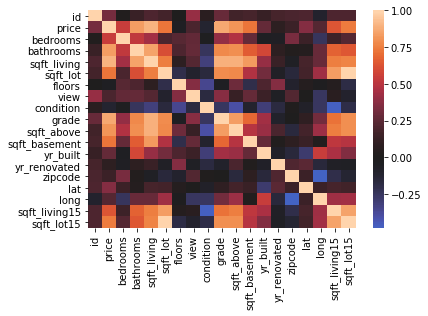

In [76]:
sns.heatmap(data_pred.corr(), center=0,);

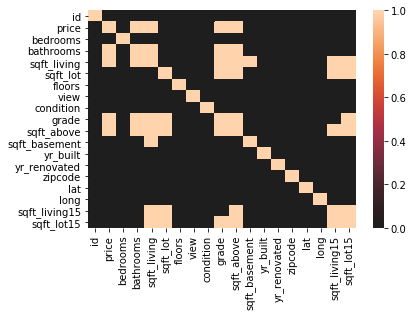

In [77]:
sns.heatmap(abs(data_pred.corr())>0.75, center=0,);

First I will investigate which variables have a higher correlation to our target variable- price- in order to decide which ones to drop. 

In [78]:
#bathrooms vs. grade, sqft_above, sqft_living
df[['price','bathrooms']].corr()

price  bathrooms
price      1.000000   0.525915
bathrooms  0.525915   1.000000

In [79]:
df[['price','grade']].corr()

price     grade
price  1.000000  0.667964
grade  0.667964  1.000000

In [80]:
df.drop(['bathrooms'], axis = 1, inplace = True)

In [81]:
#sqft_living vs. sqft_basement, sqft_above, grade

In [82]:
df[['price','sqft_living']].corr()

price  sqft_living
price        1.000000     0.701929
sqft_living  0.701929     1.000000

In [83]:
df[['price','sqft_basement']].corr()

price  sqft_basement
price          1.000000       0.321103
sqft_basement  0.321103       1.000000

In [84]:
df.drop(['sqft_basement'], axis = 1, inplace = True)

In [85]:
df[['price','sqft_above']].corr()

price  sqft_above
price       1.000000    0.605392
sqft_above  0.605392    1.000000

In [86]:
df.drop(['sqft_above'], axis = 1, inplace = True)

In [87]:
df[['price','grade']].corr()

price     grade
price  1.000000  0.667964
grade  0.667964  1.000000

In [88]:
df.drop(['grade'], axis = 1, inplace = True)

In [89]:
#grade vs. sqft_lot15, sqft_above 

Grade was previously dropped, which handles the multicollinearity here. 

In [90]:
#sqft_living15 vs. sqft_lot15

In [91]:
df.drop(['sqft_living15'], axis = 1, inplace = True)

In [92]:
df.drop(['sqft_lot15'], axis = 1, inplace = True)

In [93]:
df.head()

id        date     price  bedrooms  sqft_living  sqft_lot  floors  \
0  7129300520  10/13/2014  221900.0         3         1180      5650     1.0   
1  6414100192   12/9/2014  538000.0         3         2570      7242     2.0   
2  5631500400   2/25/2015  180000.0         2          770     10000     1.0   
3  2487200875   12/9/2014  604000.0         4         1960      5000     1.0   
4  1954400510   2/18/2015  510000.0         3         1680      8080     1.0   

   view  condition  yr_built  yr_renovated  zipcode      lat     long  
0   0.0          3      1955           0.0    98178  47.5112 -122.257  
1   0.0          3      1951        1991.0    98125  47.7210 -122.319  
2   0.0          3      1933           0.0    98028  47.7379 -122.233  
3   0.0          5      1965           0.0    98136  47.5208 -122.393  
4   0.0          3      1987           0.0    98074  47.6168 -122.045

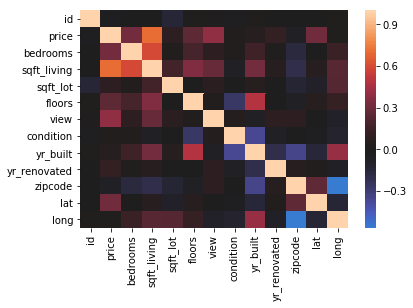

In [94]:
sns.heatmap(df.corr(), center=0,);

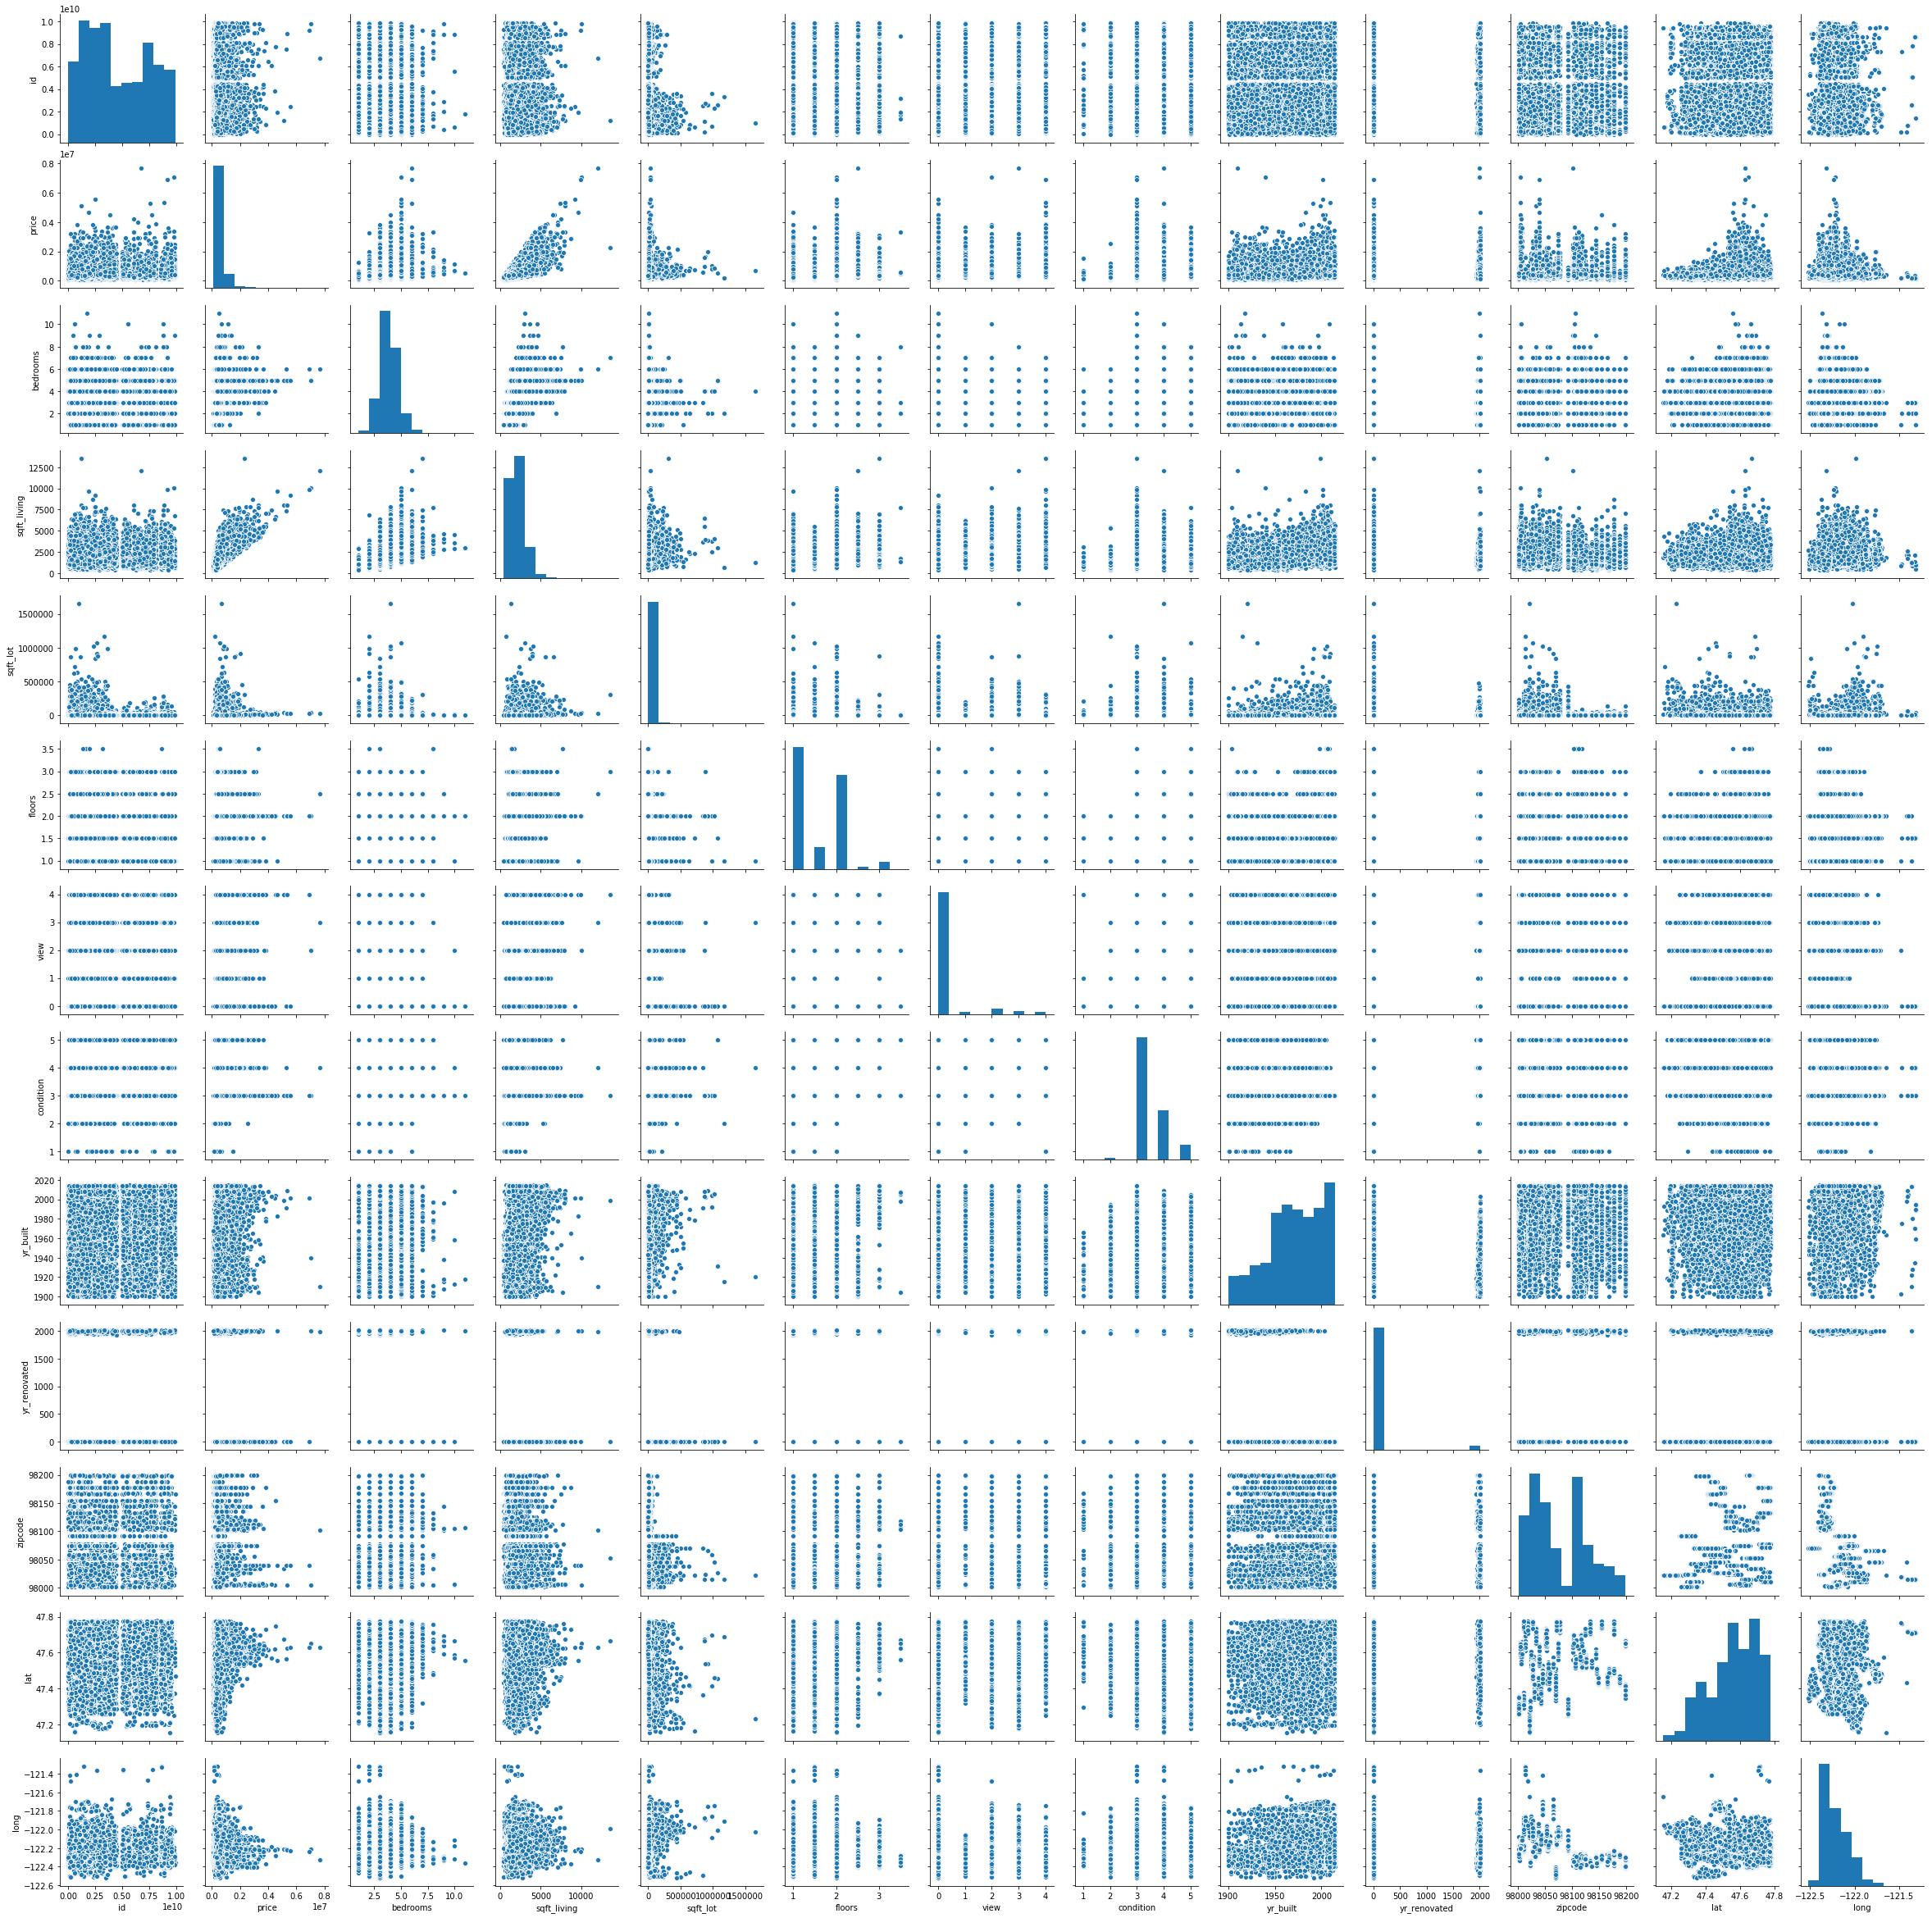

In [95]:
sns.pairplot(df)

# Create a Multivariate Regression Model 

1. Drop unnecessary columns 
2. Standardize columns
3. Use statsmodel to create a working model 

In [96]:
df.drop('id', axis = 1, inplace = True)

In [97]:
df_multiple = df.drop('date', axis = 1, inplace = True)

In [98]:
df.head()

price  bedrooms  sqft_living  sqft_lot  floors  view  condition  \
0  221900.0         3         1180      5650     1.0   0.0          3   
1  538000.0         3         2570      7242     2.0   0.0          3   
2  180000.0         2          770     10000     1.0   0.0          3   
3  604000.0         4         1960      5000     1.0   0.0          5   
4  510000.0         3         1680      8080     1.0   0.0          3   

   yr_built  yr_renovated  zipcode      lat     long  
0      1955           0.0    98178  47.5112 -122.257  
1      1951        1991.0    98125  47.7210 -122.319  
2      1933           0.0    98028  47.7379 -122.233  
3      1965           0.0    98136  47.5208 -122.393  
4      1987           0.0    98074  47.6168 -122.045

In [99]:
df.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [100]:
price = df['price']
bedrooms = df['bedrooms']
sqft_lot = df['sqft_lot']
floors = df['floors']
view = df['view']
condition = df['condition']
yr_built = df['yr_built']
yr_renovated = df['yr_renovated']
zipcode = df['zipcode']
lat = df['lat']
long = df['long']

In [101]:
scaler = MinMaxScaler()
scaled_price=scaler.fit_transform(price.values.reshape(-1,1))
scaled_bedrooms=scaler.fit_transform(bedrooms.values.reshape(-1,1))
scaled_sqft_lot = scaler.fit_transform(sqft_lot.values.reshape(-1,1))
scaled_floors = scaler.fit_transform(floors.values.reshape(-1,1))
scaled_view = scaler.fit_transform(view.values.reshape(-1,1))
scaled_condition = scaler.fit_transform(condition.values.reshape(-1,1))
scaled_yr_built = scaler.fit_transform(yr_built.values.reshape(-1,1))
scaled_yr_renovated = scaler.fit_transform(yr_renovated.values.reshape(-1,1))
scaled_zipcode = scaler.fit_transform(zipcode.values.reshape(-1,1))
scaled_lat = scaler.fit_transform(lat.values.reshape(-1,1))
scaled_long = scaler.fit_transform(long.values.reshape(-1,1))

C:\Users\kayce_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kayce_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kayce_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kayce_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kayce_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 w

In [102]:
df.head()

price  bedrooms  sqft_living  sqft_lot  floors  view  condition  \
0  221900.0         3         1180      5650     1.0   0.0          3   
1  538000.0         3         2570      7242     2.0   0.0          3   
2  180000.0         2          770     10000     1.0   0.0          3   
3  604000.0         4         1960      5000     1.0   0.0          5   
4  510000.0         3         1680      8080     1.0   0.0          3   

   yr_built  yr_renovated  zipcode      lat     long  
0      1955           0.0    98178  47.5112 -122.257  
1      1951        1991.0    98125  47.7210 -122.319  
2      1933           0.0    98028  47.7379 -122.233  
3      1965           0.0    98136  47.5208 -122.393  
4      1987           0.0    98074  47.6168 -122.045

In [103]:
#multivariate regression
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3566.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:24:37   Log-Likelihood:            -2.9619e+05
No. Observations:               21596   AIC:                         5.924e+05
Df Residuals:                   21584   BIC:                         5.925e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.262e+07   3.08e+06      4.093      0.000    6.58e+06    1.87e+07
bedrooms     -5.172e+04   2081.889    -24.843      0.000   -5.58e+04   -4.76e+04
sqft_living    290.0278      2.355    123.166      0.000     285.412     294.643
sqft_lot        -0.0673      0.038     -1.784      0.074      -0.141       0.007
floors        5.638e+04   3357.732     16.792      0.000    4.98e+04     6.3e+04
view          8.919e+04   2097.143     42.531      0.000    8.51e+04    9.33e+04
condition     2.695e+04   2532.420     10.642      0.000     2.2e+04    3.19e+04
yr_built     -1502.3150     71.324    -21.063      0.000   -1642.116   -1362.514
yr_renovated    38.0240      4.282      8.879      0.000      29.630      46.418
zipcode       -758.5941     35.602    -21.307      0.000    -828.377    -688.811
lat           6.874e+05   1.14e+04     60.246      0.000    6.65e+05     7.1e+05
long         -2.615e+05   1.37e+04    -19.080      0.000   -2.88e+05   -2.35e+05
==============================================================================
Omnibus:                    16279.933   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           997245.150
Skew:                           3.080   Prob(JB):                         0.00
Kurtosis:                      35.716   Cond. No.                     2.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
df.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

Given the following independent variables: bedrooms, bathrooms, square foot lot, floors, view, condition, grade, square feet above, square footage of basement, year built, year renovated, zipcode, latitude, longitude. Our model presented here will explain 68% of the change in dependent variable (price). Each predictor is statistically signficant at the 0.05 level, with the exception of the floors predictor, which has a p value of 0.052.
A drawback of this model is that it requires each variable to be input which is a little time consuming given the accuracy. 

In [105]:
#RFE
linreg= LinearRegression()
selector3=RFE(linreg,n_features_to_select = 3).fit(predictors,df['price'])

In [106]:
selected_columns= predictors.columns[selector3.support_]
selected_columns

Index(['floors', 'view', 'lat'], dtype='object')

In [107]:
formula3 = "price ~ floors+view+lat"
model3 = ols(formula= formula3, data = df).fit()

In [108]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     3096.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:24:37   Log-Likelihood:            -3.0351e+05
No. Observations:               21596   AIC:                         6.070e+05
Df Residuals:                   21592   BIC:                         6.071e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.667e+07   7.18e+05    -51.052      0.000   -3.81e+07   -3.53e+07
floors      1.576e+05   3879.992     40.607      0.000     1.5e+05    1.65e+05
view         1.85e+05   2735.062     67.640      0.000     1.8e+05     1.9e+05
lat         7.765e+05   1.51e+04     51.397      0.000    7.47e+05    8.06e+05
==============================================================================
Omnibus:                    19963.709   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1779768.802
Skew:                           4.167   Prob(JB):                         0.00
Kurtosis:                      46.686   Cond. No.                     1.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3 selectors greatly lowers our r squared value, I will bump it up to 5 and see what happens. 

In [109]:
linreg= LinearRegression()
selector5=RFE(linreg,n_features_to_select = 5).fit(predictors,df['price'])

In [110]:
selected_columns5= predictors.columns[selector5.support_]
selected_columns5

Index(['bedrooms', 'floors', 'view', 'lat', 'long'], dtype='object')

In [111]:
formula5 = "price ~ floors+view+lat+bedrooms+long"
model5 = ols(formula= formula5, data = df).fit()

In [112]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     2480.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:24:37   Log-Likelihood:            -3.0248e+05
No. Observations:               21596   AIC:                         6.050e+05
Df Residuals:                   21590   BIC:                         6.050e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.721e+07   1.82e+06    -14.959      0.000   -3.08e+07   -2.36e+07
floors      1.231e+05   3786.163     32.508      0.000    1.16e+05    1.31e+05
view        1.772e+05   2625.799     67.478      0.000    1.72e+05    1.82e+05
lat         8.035e+05   1.45e+04     55.227      0.000    7.75e+05    8.32e+05
bedrooms    1.023e+05   2266.161     45.142      0.000    9.79e+04    1.07e+05
long        9.026e+04   1.46e+04      6.192      0.000    6.17e+04    1.19e+05
==============================================================================
Omnibus:                    20239.082   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1962962.222
Skew:                           4.234   Prob(JB):                         0.00
Kurtosis:                      48.932   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
df.head()

price  bedrooms  sqft_living  sqft_lot  floors  view  condition  \
0  221900.0         3         1180      5650     1.0   0.0          3   
1  538000.0         3         2570      7242     2.0   0.0          3   
2  180000.0         2          770     10000     1.0   0.0          3   
3  604000.0         4         1960      5000     1.0   0.0          5   
4  510000.0         3         1680      8080     1.0   0.0          3   

   yr_built  yr_renovated  zipcode      lat     long  
0      1955           0.0    98178  47.5112 -122.257  
1      1951        1991.0    98125  47.7210 -122.319  
2      1933           0.0    98028  47.7379 -122.233  
3      1965           0.0    98136  47.5208 -122.393  
4      1987           0.0    98074  47.6168 -122.045

This is still much lower than my original model. I will try 7 selectors and see what it does to my r squared. 

In [114]:
linreg= LinearRegression()
selector7=RFE(linreg,n_features_to_select = 7).fit(predictors,df['price'])

In [115]:
selected_columns7= predictors.columns[selector7.support_]
selected_columns7

Index(['bedrooms', 'floors', 'view', 'condition', 'zipcode', 'lat', 'long'], dtype='object')

In [116]:
formula7 = "price ~ floors + view + lat + bedrooms + long + condition +zipcode"
model7 = ols(formula= formula7, data = df).fit()

In [117]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     1918.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:24:37   Log-Likelihood:            -3.0216e+05
No. Observations:               21596   AIC:                         6.043e+05
Df Residuals:                   21588   BIC:                         6.044e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.432e+07    3.7e+06     11.989      0.000    3.71e+07    5.16e+07
floors      1.368e+05   3868.183     35.360      0.000    1.29e+05    1.44e+05
view        1.794e+05   2594.989     69.117      0.000    1.74e+05    1.84e+05
lat         8.804e+05   1.47e+04     59.713      0.000    8.52e+05    9.09e+05
bedrooms    9.468e+04   2252.913     42.027      0.000    9.03e+04    9.91e+04
long       -9.361e+04   1.71e+04     -5.466      0.000   -1.27e+05      -6e+04
condition   3.854e+04   3158.966     12.200      0.000    3.23e+04    4.47e+04
zipcode     -997.1165     46.126    -21.617      0.000   -1087.526    -906.707
==============================================================================
Omnibus:                    20272.137   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2037433.130
Skew:                           4.232   Prob(JB):                         0.00
Kurtosis:                      49.825   Cond. No.                     1.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
linreg= LinearRegression()
selector10=RFE(linreg,n_features_to_select =10).fit(predictors,df['price'])

In [119]:
selected_columns10= predictors.columns[selector10.support_]
selected_columns10

Index(['bedrooms', 'sqft_living', 'floors', 'view', 'condition', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [120]:
formula10= "price ~ floors+view+lat+bedrooms+long+condition+zipcode+sqft_living+yr_built+yr_renovated"
model10 = ols(formula= formula10, data = df).fit()

In [121]:
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3922.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:24:37   Log-Likelihood:            -2.9619e+05
No. Observations:               21596   AIC:                         5.924e+05
Df Residuals:                   21585   BIC:                         5.925e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.205e+07   3.07e+06      3.929      0.000    6.04e+06    1.81e+07
floors        5.666e+04   3354.298     16.892      0.000    5.01e+04    6.32e+04
view          8.906e+04   2095.925     42.492      0.000     8.5e+04    9.32e+04
lat            6.89e+05   1.14e+04     60.581      0.000    6.67e+05    7.11e+05
bedrooms     -5.139e+04   2073.521    -24.782      0.000   -5.55e+04   -4.73e+04
long         -2.661e+05   1.35e+04    -19.754      0.000   -2.92e+05    -2.4e+05
condition     2.702e+04   2532.276     10.669      0.000    2.21e+04     3.2e+04
zipcode       -759.3790     35.601    -21.330      0.000    -829.160    -689.598
sqft_living    289.3483      2.324    124.511      0.000     284.793     293.903
yr_built     -1494.6680     71.199    -20.993      0.000   -1634.224   -1355.112
yr_renovated    38.0898      4.282      8.894      0.000      29.696      46.484
==============================================================================
Omnibus:                    16298.515   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1003014.814
Skew:                           3.084   Prob(JB):                         0.00
Kurtosis:                      35.812   Cond. No.                     2.02e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
linreg= LinearRegression()
selector8=RFE(linreg,n_features_to_select =8).fit(predictors,df['price'])

In [123]:
selected_columns8= predictors.columns[selector8.support_]
selected_columns8

Index(['bedrooms', 'floors', 'view', 'condition', 'yr_built', 'zipcode', 'lat',
       'long'],
      dtype='object')

In [124]:
formula8= "price ~ floors+view+lat+bedrooms+long+condition+yr_built"
model8 = ols(formula= formula8, data = df).fit()

In [125]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:24:37   Log-Likelihood:            -3.0239e+05
No. Observations:               21596   AIC:                         6.048e+05
Df Residuals:                   21588   BIC:                         6.049e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.35e+07   2.07e+06    -11.344      0.000   -2.76e+07   -1.94e+07
floors      1.407e+05   4339.658     32.433      0.000    1.32e+05    1.49e+05
view        1.755e+05   2619.811     66.979      0.000     1.7e+05    1.81e+05
lat         8.011e+05   1.47e+04     54.525      0.000    7.72e+05     8.3e+05
bedrooms    1.001e+05   2269.645     44.122      0.000    9.57e+04    1.05e+05
long         1.18e+05   1.57e+04      7.533      0.000    8.73e+04    1.49e+05
condition   4.084e+04   3317.072     12.312      0.000    3.43e+04    4.73e+04
yr_built    -181.0684     89.355     -2.026      0.043    -356.211      -5.926
==============================================================================
Omnibus:                    20404.188   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2034873.910
Skew:                           4.283   Prob(JB):                         0.00
Kurtosis:                      49.776   Cond. No.                     2.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

RFE will be most effective if we use it to narrow down the 9 or 10 most important selectors. 

Powerpoint: https://docs.google.com/presentation/d/1CaZln-Z2OnkXDkeKU5qMa_fncQl5yUOrstEqqNyZhh8/edit#slide=id.p

# Validating the Model 

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, price, test_size = 0.2)

In [134]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17276 4320 17276 4320


In [133]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [135]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 47832010548.26452
Test Mean Squarred Error: 48220110290.01941


The train and test data are similar, which means the model is neither underfit nor overfit. 